## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# The Bread Basket


### Project participants:

* Daolin Sheng (ml192ds@leeds.ac.uk)
* Xiangyu Li   (ml19xl4@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

This project just contains a dataset and it comes from a Kaggle web-page( [The Bread Basket](https://www.kaggle.com/mittalvasu95/the-bread-basket), the file name called `bread_basket.csv`), and it belongs to "The Bread Basket" a bakery located in Edinburgh. This a sample dataset about online shopping. The dataset includes more than 9000 transactions of customers who order different items from this bakery online from 30-10-2016 to 09-04-2017 and has 20507 entries.

The dataset has 5 columns and they are ‘Transaction’, ‘Item’, ’date_time’, ‘period_day’, ‘weekday_weekend’ respectively. The first column ‘Transaction’ is the transaction id which is unique for each order and ranges from 1 to 9684, and there is not missing column value. The second column name is called ‘Item’ which includes more than 20 different food goods name, such as Bread, Coffee and Jam etc, and there is not missing column value. The third column is the date and time of every transaction, and the format of column value is ‘dd-mm-yyyy hh:mm’. the fourth column value is a period time of one day when a customer places an order and it has two main value ‘morning’ and ‘afternoon’. the last column is called ‘weekday_weekend’ which only has two different values and they represent whether these orders are on weekday or weekend. 

In conclusion, this is a simple business dataset, and There are no missing values in this data set.


## Project Aim and Objectives (5 marks)

This dataset is about the bakery online sales data, so we want to develop a simple system which will contain three main modules. These modules are statistics, search and recommendation respectively and they should help the bakery manager better to operate and manage this bakery and to increase sales. In order to implement this simple system, we can start from the following aims.

The first aim, we want to this system can have a statistic module based on the history data. To specific, we can get we want to get statistic data. For example, the sales volume over a period of time, the percentage of sales of each product or the max sales volume of a day etc, and these statistics data can be easily visualized.

The second aim, we hope this system can have a search module which can return different results based on the different search criteria. By inputting a parameter ‘n’, for instance, we can find the top ‘n’ products in sales volume. 

The last aim is about a recommendation module. This module needs to have a function which can recommend products as accurately as possible to customers based on his/her purchase data. This function will be implemented based on a machine learning algorithms.

To sum up, these aims or objects will fulfill the demands of different aspects of a system. The specific objectives following:


### Specific Objective(s)

* __Objective 1:__ Count historical sales volume(daily, monthly).
* __Objective 2:__ Find the top 'n' popular products  in a period of time.
* __Objective 3:__ Recommend products to customers

## System Design (5 marks)


### Architecture

![Project_Architecture.png](./Project_Architecture.png)

This is a simple architecture of this project and it contains 5 steps to complete this project. Of course, this architecture is a general data science pipeline. The first three steps are data wrangling, data cleansing and data preparation, and they all belong to data engineering. The data wrangling includes identification, collection and combination etc. These are important parts of the data wrangling to prepare for the data cleaning. The next step is data cleansing which can handle the common errors in a dataset and make sure the data set is valid. The third step is data preparation, and there are special tasks, such as one-hot encode, normalization, to prepare for a machine learning algorithm. 

The fourth step mainly uses some algorithms to process data. These algorithms would include search algorithm, count algorithm and recommendation algorithm. The last step can get the result according to the function implemented in the previous step. In this project, the output result would be an items list,or a table, or a visual diagram, or a text report.

**Note, if the digram can not shown in this file, please see my github address:** (https://github.com/linksdl/acs-project-programming_data_science/blob/master/2-Assessments/A3-Data%20Analysis%20Project/assignment3-v1/Project_Architecture.png)
  
### Processing Modules and Algorithms

* Convert the column date_time to other six different columns(the date_time column will be split into other different six columns)
* Count the total sales of every day and every month.
* Implement an algorithm to find the top n popular items over period of time(this algorithm contains two parameters)
* Convert the dataset into a pandas DataFrame to recommendation algorithm.


# Program Code (15 marks)

Import the some modules needed for this project. Data handling package numpy and pandas and the data visualization module matplotlib and seaborn.

In [2]:
# Import the module numpy, pandas, matplotlib, seaborn to handle and visualize data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Using the pandas `read_csv()` load the dataset and convert the raw dataset into a DataFrame. By using pands built-in function `head()`, `tail()`, `describe()` and `info()` get the dataset profile and then do the data cleansing.

If can't load this dataset, plaease see this my github address: (https://github.com/linksdl/acs-project-programming_data_science/blob/master/2-Assessments/A3-Data%20Analysis%20Project/assignment3-v1/bread_basket.csv)

In [3]:
# load the dataset into pandas DataFrame.
df = pd.read_csv('./bread_basket.csv') 
# load the fist 6 entries.
display(df.head(6))
# load the last 6 entries.
display(df.tail(6))
# get the info of the DataFrame.
display(df.info())

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend


,Transaction,Item,date_time,period_day,weekday_weekend
20501,9682,Tacos/Fajita,09-04-2017 14:32,afternoon,weekend
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend
20506,9684,Smoothies,09-04-2017 15:04,afternoon,weekend


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


None

**By parsing the dataset, because there are not errors in the dataset and there is one dataset in this project, it is not necessary to merge dataset and data cleansing. we diectly entry into the step three 'Data preparation'.**

the following funtion `dataset_datetime_split()` implement the function which split the column into other six different columns.

In [5]:
# The input argument is a pandas DataFrame.
def dataset_datetime_split(df):
    # Formatting the date_time into the right format.
    df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
    # Getting the date
    df['date']  = df['date_time'].dt.date
    # Getting the time
    df['time']  = df['date_time'].dt.time
    # Getting the ymonth
    df['ymonth'] = df['date_time'].apply(lambda x:x.strftime('%Y-%m'))
    # Getting the month
    df['month'] = df['date_time'].dt.month
    # Replacing the month with text.
    df['month'] = df['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12), 
             ('January','February', 'March', 'April', 'May', 'June', 'July', 
              'August', 'September', 'October', 'November', 'December'))
    # Getting the weekday
    df['weekday'] = df['date_time'].dt.weekday
    # Replacing the week with text.
    df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), ('Monday','Tuesday',
                                  'Wednesday','Thursday','Friday','Saturday','Sunday'))
    # Getting the hour
    df['rhour'] = df['date_time'].dt.hour
    # Replacing the hour with different time range text.
    df['rhour'] = df['rhour'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                       18, 19, 20, 21, 22, 23,0),
                                       ('00-01', '01-02', '02-03', '03-04', 
                                        '04-05', '05-06', '06-07', '07-08', 
                                        '08-09', '09-10', '10-11', '11-12', 
                                        '12-13', '13-14', '14-15', '15-16', 
                                        '16-17', '17-18', '18-19', '19-20', 
                                        '20-21', '21-22', '22-23', '23-00'))
    # add a new column
    df['num'] = 1
    
    return df

df = dataset_datetime_split(df)
df.head(6)

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,ymonth,month,weekday,rhour,num
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,2016-10,October,Sunday,08-09,1
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,2016-10,October,Sunday,09-10,1
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,2016-10,October,Sunday,09-10,1
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1
5,3,Cookies,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,2016-10,October,Sunday,09-10,1


The following function `daily_sales()` and `monthly_sales()` is countting  the sales respectively.

In [11]:
# Count the sales of every day.
def daily_sales():
    date_list = list(df['date'].apply(lambda x:x.strftime('%Y-%m-%d')))  
    trans_dates = []
    for d in date_list:
        if d not in trans_dates:
            trans_dates.append(d)
    sales_num = []       
    for t in trans_dates:
        num = 0
        for d in date_list:
            if t == d:
                num +=1
        sales_num.append(num)
        
    return trans_dates, sales_num

# Count the sales of every month
def monthly_sales():
    ymonth_list = list(df['ymonth'])   
    trans_months = []
    for d in ymonth_list:
        if d not in trans_months:
            trans_months.append(d)
    sales_num = []       
    for t in trans_months:
        num = 0
        for d in ymonth_list:
            if t == d:
                num +=1
        sales_num.append(num)
        
    return trans_months, sales_num


The function `top_n_popular_items()` is to implement the function which will return different results based on the different parmeters `n` and `date_range`. For example, if the arguments are '5' and "['09-10-2016', '11-03-2017']", the funciton will return the top 5 popular intems by coustomers liked between 09-10-2016 and 11-03-2017.

In [12]:
import datetime
# Count the total sales of the top n items in period of time.
def top_n_popular_items(n, date_range, df):
    start_date = datetime.datetime.strptime(date_range[0], '%d-%m-%Y').date()
    end_date = datetime.datetime.strptime(date_range[1], '%d-%m-%Y').date()
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    x = df.Item.value_counts().head(n).index
    y = df.Item.value_counts().head(n).values
    
    return x, y

The function `apriori_model_algorithm()` is a simple algorithm based on the method of association rule learning. Association Rules reflect the interdependence and association between a thing and other things. It is an important technology of data mining, which is used to mine the correlation between valuable data items from a large amount of data.In this function, we use Apriori algorithm to implement the correlation between different items. Finally, when a customer purchases a food item, we can recommend a item to this customer based on the correlation rules.

In [13]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

trans_items = []
for i in range(1, df['Transaction'].nunique() + 1):
    temp = df[df['Transaction'] == i]
    items = list(temp['Item'])
    if (len(items) > 0):
        trans_items.append(items)

In [31]:
def apriori_model_algorithm(trans_items):
    encoder = TransactionEncoder()
    # one-hot encode
    te_ary = encoder.fit(trans_items).transform(trans_items)
    df = pd.DataFrame(te_ary, columns=encoder.columns_)
    # Find the frequent items
    frequent_items = apriori(df, min_support=0.015, use_colnames=True)
    # Set the metric type is confidence and the min threshold equal 0.3
    result = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    result.sort_values('confidence', ascending=False, inplace=True)
    
    return result

display(apriori_model_algorithm(trans_items))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Toast),(Coffee),0.033272,0.478881,0.023226,0.698052,1.457674,0.007292,1.725857
7,(Medialuna),(Coffee),0.062763,0.478881,0.035541,0.566265,1.182476,0.005485,1.201469
9,(Pastry),(Coffee),0.086745,0.478881,0.047964,0.552927,1.154622,0.006423,1.165623
6,(Juice),(Coffee),0.037809,0.478881,0.020417,0.540000,1.127629,0.002311,1.132868
0,(Alfajores),(Coffee),0.035757,0.478881,0.019229,0.537764,1.122961,0.002105,1.127388
10,(Sandwich),(Coffee),0.071081,0.478881,0.037917,0.533435,1.113919,0.003878,1.116926
3,(Cake),(Coffee),0.103813,0.478881,0.054769,0.527575,1.101684,0.005055,1.103074
11,(Scone),(Coffee),0.034784,0.478881,0.018040,0.518634,1.083012,0.001383,1.082583
4,(Cookies),(Coffee),0.054445,0.478881,0.028087,0.515873,1.077247,0.002014,1.076410
5,(Hot chocolate),(Coffee),0.059198,0.478881,0.029923,0.505474,1.055533,0.001574,1.053776


# Project Outcome (10 + 10 marks)

## Overview of Results

This is a general overview of the results. The first objective is counting the historical sales volume. We will show the results through two line charts(Figure1 and Figure2). Figure one is about the sales trend of every day. Figure two is about the sales trend of every month. We can get some statistic data from the two charts.

The second objective is finding the top `n` popular products in a period of time. In this objective, we will use two different charts(Figure3 and Figure4) to show the results. Figure three is a bar chart showing in the top ten popular items. Figure four is a pie chart showing the percentage of every item among the top ten items. We can find the total sale of every item and can know which item is the most popular product in this bakery.

The last objective is recommending products to customers. We use an unsupervised algorithm to complete this objective. We build a pandas DataFrame about the correlations of every item. Then, we can recommend a product to a customer based on two indexes (confidence and lift). 

For details, please see every section below.

## Objective 1 :  Count historical sales volume(daily, monthly)

### Explanation of Results

This aim is to count the total sales of every day and every month in a period of time. Figure one is about the total sales of every day. It is plotted in a line chart. In order to plot this chart clearly, we just select the first 50 entries. As this figure is shown below, this is a sales trend every day. We can see the maximum sales (about 280) and minimum sales(about 40) from this picture, and the average sales per day are about 150. So, we can get the statistics data from this figure. 

Similarly, figure 2 is about the sales trend of every month by counting the total sales of every month from 2016-10-30 to 2017-04-11. the total sales of the first month and last month are lower than in other months because the dataset is incomplete. From the second figure, we can found the total sales of every month is around 3900 except for the first month and the last month. 

To sum up, this is an efficient solution by describing the sales trend, which can help the bakery manager to view the sale figure easily. 

### Visualisation
The following line chart gives a vivid representation of trend sales of every day and every month.

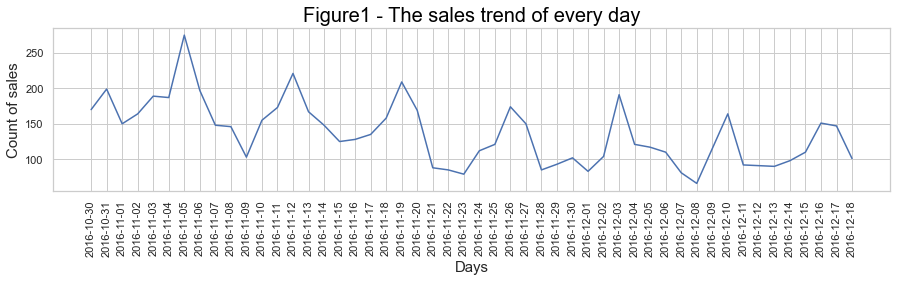

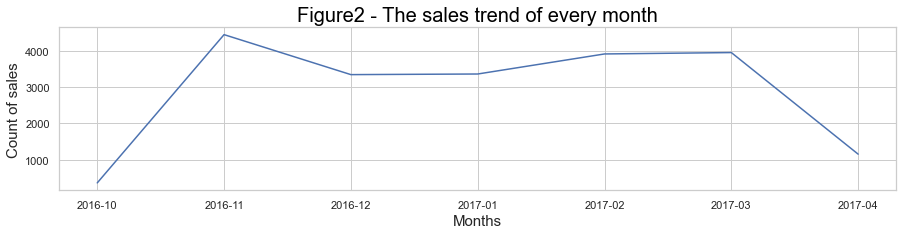

In [17]:
sns.set_theme(style="whitegrid")
dx, dy = daily_sales() # The total sales of every day
f1 = plt.figure(figsize=(15,3))
sns.lineplot(dx[0:50], dy[0:50], palette="tab10", linewidth=1.5)
plt.xlabel('Days', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Count of sales', size = 15)
plt.title('Figure1 - The sales trend of every day', color = 'black', size=20)

mx, my = monthly_sales() # The total sales of every month
f2 = plt.figure(figsize=(15,3))
sns.lineplot(mx, my, palette='gnuplot')
plt.xlabel('Months', size = 15)
plt.ylabel('Count of sales', size = 15)
plt.title('Figure2 - The sales trend of every month', color = 'black', size=20)
plt.show()

## Objective 2 : Find the top 'n' popular products in a period of time
### Explanation of Results

In this section, we can use the function ‘top_n_popular_items()’ to get the most liked products by customers. Figure three shown below. In this example, we get the top ten popular items bought by customers from 2016-10-30 to 2017-04-11. As figure 3 and figure 4 shown, The coffee has the largest sales (about 5600) among all items and it accounts for around 36.45% of the total sales of the top ten popular items. The second, third and fourth items are bread, tea and Cake respectively, and they account for around 22.15%, 9.56%, 6.83% respectively.

The pastry, sandwich have similar sales (about 800) accounted for 5.20% among all items. Other items have different sales between 400 to 600. We can observe that the total sales volume of the first three items accounts for about 68.16%.

To sum up, we can find the most popular products in this way, which can help the bakery manager to store and prepare goods.

### Visualisation

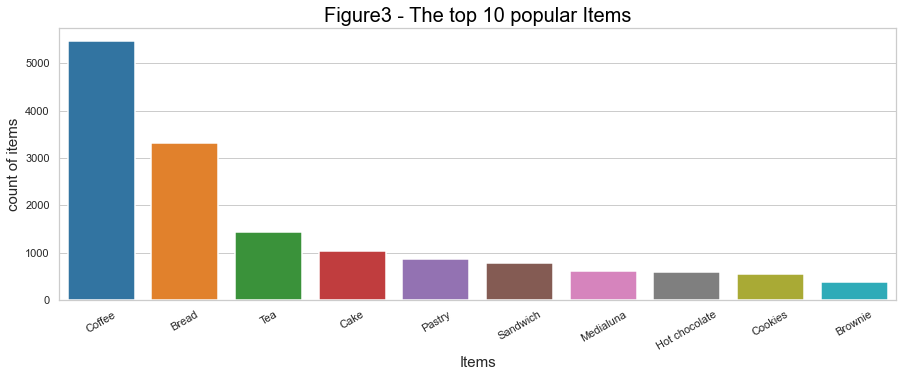

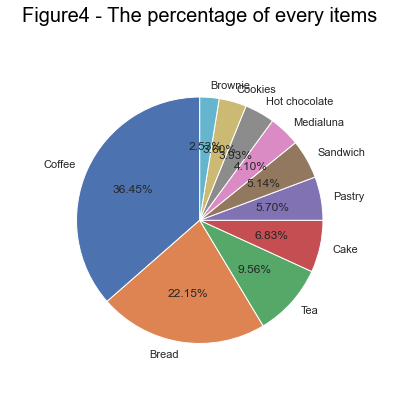

In [32]:
top_n = 10
time_range = ['30-10-2016', '11-04-2017']
X, Y = top_n_popular_items(top_n, time_range, df)
f1 = plt.figure(figsize=(15,5))
sns.barplot(X, Y, palette="tab10", linewidth=1.5)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=30)
plt.ylabel('count of items', size=15)
title = 'Figure3 - The top ' + str(top_n) + ' popular Items'
plt.title(title, color = 'black', size= 20)

f2 = plt.figure(figsize=(15,6))
plt.pie(x=Y, labels=X, autopct="%0.2f%%",startangle = 90,pctdistance = 0.6, radius=0.8)
plt.title('Figure4 - The percentage of every items', color = 'black', size= 20)
plt.tight_layout()
plt.show()

## Objective 3 ： Recommend products to customers
### Explanation of Results

The table is shown correlations computing by Apriori algorithm between different items. Apriori algorithm is an unsupervised learning algorithm and it is looking for a certain relationship between data in a bunch of data sets the same as the K-means algorithm. In this algorithm, we need to compute the frequent items and correlation rules. Then we need to complete the recommendation task based on two indexes(confidence and lift). the confidence represents the probability of a good being bought.

In this table, for example, If we assume that a customer buys a toast and then the probability of buying coffee is 69.80%, and he/his maybe buy 1.45 coffee again. Similarly, if one customer bought a pastry, he/she will buy bread and the probability is about 33.75%. 

To sum up, this a simple recommendation algorithm. By this way, we can obtain which products have a strong relationship, then bundling these products as a whole to recommend to a customer, which will help the bakery to increase the sale volume.

### Visualisation
A table is shown below.

In [20]:
correction_df = apriori_model_algorithm(trans_items)
display(correction_df)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Toast),(Coffee),0.033272,0.478881,0.023226,0.698052,1.457674,0.007292,1.725857
13,(Spanish Brunch),(Coffee),0.017608,0.478881,0.010479,0.595092,1.242672,0.002046,1.287006
7,(Medialuna),(Coffee),0.062763,0.478881,0.035541,0.566265,1.182476,0.005485,1.201469
9,(Pastry),(Coffee),0.086745,0.478881,0.047964,0.552927,1.154622,0.006423,1.165623
6,(Juice),(Coffee),0.037809,0.478881,0.020417,0.540000,1.127629,0.002311,1.132868
0,(Alfajores),(Coffee),0.035757,0.478881,0.019229,0.537764,1.122961,0.002105,1.127388
10,(Sandwich),(Coffee),0.071081,0.478881,0.037917,0.533435,1.113919,0.003878,1.116926
3,(Cake),(Coffee),0.103813,0.478881,0.054769,0.527575,1.101684,0.005055,1.103074
11,(Scone),(Coffee),0.034784,0.478881,0.018040,0.518634,1.083012,0.001383,1.082583
4,(Cookies),(Coffee),0.054445,0.478881,0.028087,0.515873,1.077247,0.002014,1.076410


# Conclusion (5 marks)


### Acheivements

As we had expected, we count the total sales of every day and every month from 2016-10-31 to 2017-04-11, and we can see the sales trend of every day and every month. This will help us have a good track on the business situation of the store. Besides, we can get which items are sold in high volume based on the history data. Finally, by finding the relationship between different items, we can recommend the product to a customer.

### Limitations

There are two limitations in this project.

* The project was limited to a small dataset, which may affect the accuracy of the recommendation.
* There are only five columns in this data set. If we can know more information, such as the price of every item, the category of every item etc., will be better.

### Future Work

In future work, we hope to collect more and more diverse data sets. And then, we will improve this system through other common algorithms and machine learning algorithms. We hope build a good system to support the data analysis in the future.


# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [14]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60